# Machine Learning
 - 인공지능을 구현하는 여러 방법 중 가장 대표적인 접근 방법
 - 사람이 경험을 토대로 가치관을 형성한 후 이를 기반으로 의사결정하는 것을 모방
 - 컴퓨터에게 데이터를 학습시켜 규칙(Rule or Policy)을 생성시키고 이를 기반으로 의사결정을 하는 것

### 머신러닝 용어 정리
 - 특성(Feature): 독립 변수, 입력 데이터, X
 - 레이블(Label): 종속 변수, 정답, Target, 결과, 예측값
 - 모델: 예측(추론)을 위해 데이터를 학습시켜 생성한 규칙 혹은 규칙을 생성하기 위해 사용하는 기법
 - 하이퍼파라미터(hyperparameter): 모델의 설정값
 - 데이터셋(dataset): 학습에 사용할 데이터의 묶음


### 머신러닝 학습 종류
 - 지도 학습
   - 입력 데이터에 대한 정답을 예측하기 위해 학습 과정에서 정답과 비교하여 차이를 줄여가는 학습 방법
   - 분류와 회귀
     - 분류: 입력 데이터를 토대로 범주형 레이블을 예측
     - 회귀:
       1. 입력 데이터를 토대로 연속형 레이블을 예측
       2. 입력 데이터와 레이블 간의 선형 관계를 파악하기 위한 분석 기법
 - 비지도 학습
   - 입력 데이터 간의 차이(패턴)를 파악하기 위해 정답 없이 입력 데이터만으로 차이를 비교하는 학습 방법
   - 군집, 차원 축소

# Scikit-learn
 - 파이썬으로
구현한 기계 학습 오픈 소스 라이브러리
 - 통일된 인터페이스
   - 학습기, 전처리기 모두 유사한 사용법 제공
 - 지도, 비지도, 전처리, 평가 등 다양한 기능 구현
   - 선형회귀, 최근접 이웃, 의사결정나무, 랜덤포레스트 등의 지도학습 모형
   - 군집, PCA 등의 비지도 학습 모형
   - 스케일링, 다항변환, 인코딩 등의 전처리 기법
   - 회귀/분류의 평가 측도
 - Scikit-learn API:
   - https://scikit-learn.org/stable/modules/classes.html

In [1]:
# scikit learn import 방법
# 패키지 이름은 sklearn
# sklearn은 전체를 import하면 하위 패키지가 자동으로 포함되지 않을 수 있기 때문에
# 일반적으로 아래와 같은 형태의 클래스/함수수 단위로 추가합니다.
# from sklearn.하위패키지/모듈 import 클래스/함수 

from sklearn.model_selection import train_test_split # 예시


In [2]:
# 버전 확인을 위해서는 sklearn을 추가해야 함
import sklearn

sklearn.__version__

'1.2.2'

### 머신러닝 파이플라인
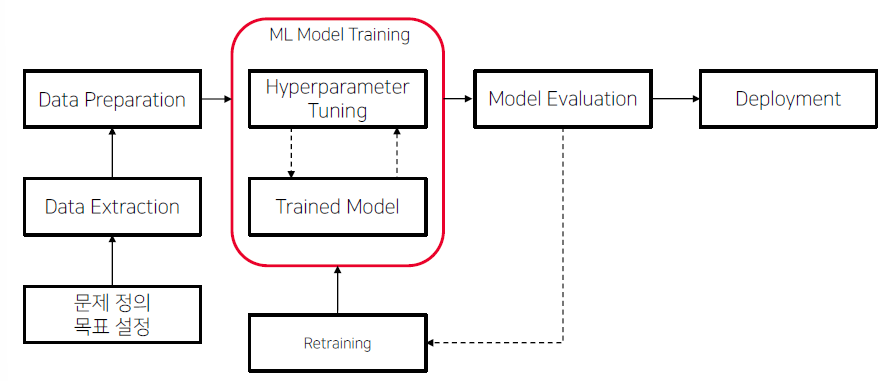

 1. 문제 정의 및 목표 설정
 2. 탐색적 데이터 분석
 3. 데이터 전처리
 4. 모델링
    1. 모델 선정
    2. 모델 설정
 5. 모델 평가(검증)
 6. 배포

### 데이터 분할
 - 전체 데이터를 학습용과 평가용으로 분할
   - 학습용 데이터: 학습과 평가 모두에 사용
   - 평가(검증)용 데이터: 평가에만 사용됨
 - 과대적합을 방지하기 위함
   - 과대적합이란?
     - 학습한 데이터를 제외한 다른 데이터는 잘 맞히지 못하는 상태
   - 학습용 데이터가 아닌 다른(평가용) 데이터로 검증
 - 분할 방법
   1. Slicing 이용
   2. Scikit-learn의 train_test_split 함수 이용

In [1]:
# 데이터 다운로드
import gdown
import warnings

warnings.filterwarnings('ignore')

url = 'https://drive.google.com/uc?id=117Z9BEXCcK7oiQq7-7vOv-A9cBpO1qmw'
gdown.download(url, 'boston.csv', quiet=False)

url = 'https://drive.google.com/uc?id=1jg0kazZ-5kJeqgIi_6YsZTn_gLKWWB4x'
gdown.download(url, 'wine.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=117Z9BEXCcK7oiQq7-7vOv-A9cBpO1qmw
To: /content/boston.csv
100%|██████████| 39.7k/39.7k [00:00<00:00, 28.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jg0kazZ-5kJeqgIi_6YsZTn_gLKWWB4x
To: /content/wine.csv
100%|██████████| 84.2k/84.2k [00:00<00:00, 42.3MB/s]


'wine.csv'

In [5]:
!pip install gdown

In [3]:
# 데이터 로드
# 보스턴 주택가격 데이터
# 1970년 보스턴 지역의 주택 가격을 수집한 데이터로
# 범죄율, 세율, 접근성 등을 수치화한 데이터
import pandas as pd

df = pd.read_csv('boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
# Slicing을 이용한 데이터 분할
# 특정 개수로 분할
# 학습 400개, 평가 106개로 분할
train = df[:400]
test  = df[400:]
display(train.head())
display(test.head())
train.shape, test.shape

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
400,25.04610,0.0,18.1,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
401,14.23620,0.0,18.1,0.0,0.693,6.343,100.0,1.5741,24.0,666.0,20.2,396.90,20.32,7.2
402,9.59571,0.0,18.1,0.0,0.693,6.404,100.0,1.6390,24.0,666.0,20.2,376.11,20.31,12.1
403,24.80170,0.0,18.1,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,8.3
404,41.52920,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38,8.5


((400, 14), (106, 14))

In [6]:
# Slicing을 이용한 데이터 분할
# 비율로 분할
# 75:25 비율로 분할
idx = int(df.shape[0]*.75)
train = df[:idx]
test  = df[idx:]
display(train.head())
display(test.head())
train.shape, test.shape

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
379,17.86670,0.0,18.1,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78,10.2
380,88.97620,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
381,15.87440,0.0,18.1,0.0,0.671,6.545,99.1,1.5192,24.0,666.0,20.2,396.90,21.08,10.9
382,9.18702,0.0,18.1,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3
383,7.99248,0.0,18.1,0.0,0.700,5.520,100.0,1.5331,24.0,666.0,20.2,396.90,24.56,12.3


((379, 14), (127, 14))

In [7]:
# Slicing을 이용하여 분할해보기
# 전체 데이터의 1/2을 학습 데이터
# 나머지 데이터는 평가 데이터로 분할하세요.

# 코드 입력
idx = int(df.shape[0] * 0.5)
train = df[:idx]
test  = df[idx:]

display(train.head())
display(test.head())
train.shape, test.shape

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
253,0.36894,22.0,5.86,0.0,0.431,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8
254,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25,20.9
256,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11,44.0
257,0.61154,20.0,3.97,0.0,0.647,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0


((253, 14), (253, 14))

In [8]:
# 데이터를 섞은 후 분할
# 판다스의 sample 함수를 이용하면 일부 데이터를 추출할 수 있습니다.
# 추출하는 데이터 수를 전체 데이터로 입력하면 Shuffle이 가능합니다.
# 이 때 학습, 평가 데이터 모두 같은 순서로 섞인 상태에서 분할해야 하므로
# random_state를 동일한 값으로 고정합니다.
train = df.sample(df.shape[0], random_state=0)[:400]
test = df.sample(df.shape[0], random_state=0)[400:]
display(train.head())
display(test.head())
train.shape, test.shape

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,22.6
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,23.0
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,8.3
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,21.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
279,0.21038,20.0,3.33,0.0,0.4429,6.812,32.2,4.1007,5.0,216.0,14.9,396.90,4.85,35.1
227,0.41238,0.0,6.20,0.0,0.5040,7.163,79.9,3.2157,8.0,307.0,17.4,372.08,6.36,31.6
148,2.33099,0.0,19.58,0.0,0.8710,5.186,93.8,1.5296,5.0,403.0,14.7,356.99,28.32,17.8
143,4.09740,0.0,19.58,0.0,0.8710,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,15.6
334,0.03738,0.0,5.19,0.0,0.5150,6.310,38.5,6.4584,5.0,224.0,20.2,389.40,6.75,20.7


((400, 14), (106, 14))

In [9]:
# Scikit-learn을 이용한 데이터 분할
# 1. 분할 함수 추가
from sklearn.model_selection import train_test_split

# 2. 데이터 분리
# 데이터 분리가 필수는 아니지만 일반적으로 분리한 후 분할합니다.
# 분리를 하는 이유는 학습 과정에서 독립 변수와 종속 변수를 분리해서 입력으로 전달해야 하기 때문입니다.
# X = 독립 변수 (price 제외 나머지)
# Y = 종속 변수 (price)
X = df.iloc[:, :-1]
Y = df['price']

# 3. 데이터 분할
# X학습, X평가, Y학습, Y평가 = train_test_split(X, Y, random_state=123, test_size=0.25)
# random_state=정수 # 양의 정수
# test_size=0~1 # 평가 데이터에 할당할 비율, 학습 데이터는 자동 계산됩니다.
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=123, test_size=0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [10]:
# 분할된 데이터 출력력
display(x_train.head())
display(x_test.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
335,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82
170,1.20742,0.0,19.58,0.0,0.605,5.875,94.6,2.4259,5.0,403.0,14.7,292.29,14.43
241,0.10612,30.0,4.93,0.0,0.428,6.095,65.1,6.3361,6.0,300.0,16.6,394.62,12.40
379,17.86670,0.0,18.10,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
410,51.13580,0.0,18.10,0.0,0.5970,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
85,0.05735,0.0,4.49,0.0,0.4490,6.630,56.1,4.4377,3.0,247.0,18.5,392.30,6.53
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76
422,12.04820,0.0,18.10,0.0,0.6140,5.648,87.6,1.9512,24.0,666.0,20.2,291.55,14.10
199,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56


In [11]:
# 분할된 학습/평가 데이터에는 서로 겹치는 데이터가 없어야 합니다.
# 두 분할된 데이터의 인덱스를 비교하여 겹치는 인덱스가 있는 지 확인합니다.
# X 학습 데이터의 인덱스
print(x_train.index)

# X 평가 데이터의 인덱스
print(x_test.index)

# 1개라도 같은 인덱스가 있는 지 확인
# List Comprehension을 이용하여 개별로 비교
print([idx for idx in x_test.index if idx in x_train.index])

# set으로 변환한 후 교집합 연산을 통해 비교
print(set(x_test.index)&set(x_train.index))

Int64Index([335, 142, 170, 241, 379, 367, 388, 156, 433,  31,
            ...
            123, 106,  83,  17, 230,  98, 476, 322, 382, 365],
           dtype='int64', length=379)
Int64Index([410,  85, 280, 422, 199, 364,   5, 415, 209, 284,
            ...
            408, 150, 486, 362, 258, 286, 437,  20, 120, 242],
           dtype='int64', length=127)
[]
set()


In [16]:
# train_test_split 함수를 이용한 분할해보기
# 함수 추가 코드
from sklearn.model_selection import train_test_split

# X, Y 분리 코드
# X = CRIM을 제외한 모든 변수
# Y = CRIM 변수
X = df.iloc[:, 1:]
Y = df['CRIM']

# 데이터 분할 코드
# 분할 비율은 학습 70%, 평가 30%
# random_state=123
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=123, test_size=0.3 )

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

### Random Forest Regressor
 - 안정적인 성능을 보여주는 대표적인 앙상블 모델
   - 여러 개의 의사결정나무를 묶어서 각 결정나무의 결과를 취합하여 최종 결과를 도출해주는 모델
   - 의사결정나무의 치명적인 단점인 과대적합을 상당부분 해소한 모델
   - 모델의 설정값 튜닝을 많이 하지 않아도 잘 동작
   - 본래 회귀와 분류 모두 가능한 모델이지만 Scikit-learn에서는 회귀 모델과 분류 모델을 따로 구현하였음
   - 앙상블 모델이란?
     - 여러 다른 머신러닝 모델들의 결과를 취합하여 하나의 결과를 도출시키는 모델로 여러 의견을 취합하여 합의된 하나의 의견을 도출시키는 것과 같은 맥락
     - 기상 예측과 같은 분야에서는 오래 전부터 사용해왔던 대표적인 모델 성능 향상 기법
 - Scikit-learn에서의 Random Forest
   - sklearn에는 RandomForestRegressor(회귀 모델)와 RandomForestClassifier(분류 모델)를 제공

### Scikit-learn의 모델 사용법
 1. 모델 추가
   - 사용하고자 하는 모델의 클래스를 추가
   - 예) from sklearn.ensemble import RandomForestRegressor
 2. 모델 생성 (혹은 초기화)
   - 추가한 모델을 생성
   - 생성 과정에서 하이퍼파라미터를 설정해야 함
   - 예) model = RandomForestRegressor(random_state=0, n_estimators=100)
 3. 모델 학습
   - sklearn의 모든 학습 모델은 fit함수를 이용하여 학습
   - 학습 시에는 학습용 독립 변수 데이터와 종속 변수 데이터를 입력으로 전달
   - 예) model.fit(x_train ,y_train)
 4. 모델을 이용한 예측값 생성
   - predict함수에 독립 변수 데이터를 입력하여 생성
   - 독립 변수는 학습용/평가용 모두 가능
   - 예) pred = model.predict(x_train)

In [ ]:
# 학습과 검증에 사용할 데이터 분할
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=123, test_size=0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [17]:
# Scikit-learn을 이용한 보스턴 데이터 학습 예제
# 1. RandomForestRegressor 모델 추가합니다.
from sklearn.ensemble import RandomForestRegressor

# 2. RandomForestRegressor 모델 생성 및 초기화
# 설정값은 우선 random_state=0 하나만 설정합니다.
model = RandomForestRegressor(random_state=0)

# 3. RandomForestRegressor 모델 학습
# 위에서 분할한 독립 변수 데이터 x_train, 종속 변수 데이터 y_train를 학습시킵니다.
model.fit(x_train, y_train)

# 예측값을 저장할 데이터프레임 생성
df_train_result = pd.DataFrame(y_train)
df_test_result = pd.DataFrame(y_test)

# 4. 학습된 모델로 예측값 생성
# 1. x_train 데이터 전체에 대한 예측값을 생성 후 df_train_result에 저장
pred_train = model.predict(x_train)
df_train_result['pred'] = pred_train

# 2. x_test 데이터 전체에 대한 예측값을 생성 후 df_test_result에 저장
pred_test = model.predict(x_test)
df_test_result['pred'] = pred_test

In [18]:
# 두 데이터프레임 출력
display(df_train_result)
display(df_test_result)

,CRIM,pred
273,0.22188,0.194985
52,0.05360,0.052361
181,0.06888,0.068558
452,5.09017,5.088579
381,15.87440,16.738516
...,...,...
98,0.08187,0.081624
476,4.87141,5.996427
322,0.35114,0.304122
382,9.18702,13.494286


,CRIM,pred
410,51.13580,11.679641
85,0.05735,0.057560
280,0.03578,0.080937
422,12.04820,7.226405
199,0.03150,0.035325
...,...,...
310,2.63548,0.422605
91,0.03932,0.061091
151,1.49632,1.990321
426,12.24720,37.486539


### 머신러닝 모델 검증
 - 모델을 통해 얻은 예측값과 실제값의 차이를 정확히 보기 위해 다양한 측도를 이용하여 비교하는 과정
 - 평가 측도(metric)은 분류와 회귀 각각 다름
 - 측도를 이해하기 위한 기초 용어 및 개념
   - 오차(Error): 실제값 - 예측값 (모집단으로 예측)
   - 잔차(Residual): 실제값 - 예측값 (표본으로 예측)
   - 편차(Deviation): 실제값 - 평균
   - 오차(혹은 잔차)가 크다는 것은 모델의 성능이 나쁘다는 것을 의미함
   - 모든 머신러닝 모델은 오차가 작아지는 방향으로 학습됨
 - 회귀 측도:
   - MSE (Mean Squared Error): 제곱 오차를 확인하는 것이 목적
     - 제곱 오차가 크면 오차의 편차가 크다는 의미
     - 0에 가까울수록 좋음
     - RMSE (Root MSE): MSE의 크기를 원래 스케일로 되돌린 지표, 0에 가까울수록 좋음
   - RMSLE (Root Mean Squared Log Error): Under Estimation에 더 큰 패널티를 부여하는 측도
     - Under Estimation: 예측값이 실제값보다 작게 예측된 현상
     - UE인 케이스의 에러 크기를 확대 해석하여 반영
     - 0에 가까울수록 좋음
     - 주의 사항: 로그계산이 포함되기 때문에 입력 값에 음수에 있으면 안 됨!
     - 주로 수요 예측에 사용됨
 - 분류 측도:
   - Accuracy: 정확도, 전체 예측 대비 맞힌 케이스의 비율
     - 1에 가까울수록 좋음, 최악은 0

### Scikit-learn에서의 모델 검증
 - Scikit-learn에서는 다양한 측도를 포함하고 있는 metrics 모듈을 제공하고 있음
 - 대부분의 metrics 모델은 실제값과 예측값을 입력으로 받아서 계산한 결과를 반환함
 - 측도 사용법
   1. 측도 함수 추가
     - 예) from sklearn.metrics import mean_squared_error
   2. 측도 계산
     - 측도 함수에 실제값과 예측값을 순서대로 입력
     - 예) mean_squared_error(y_real, y_pred) 

In [19]:
# 위에서 만든 모델의 예측 성능 측정해보기
# 1. 측도 함수 추가
# 위 모델은 회귀 모델이었으니 회귀 모델을 위한 예측 측도인 MSE와 RMSLE를 측정해봅니다.
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# 2. 예측값 생성
# 성능 평가는 학습용 데이터와 평가용 데이터 모두를 대상으로 진행합니다.
# 따라서 예측값도 두 데이터 모두 생성합니다.

# 학습용 데이터에 대한 예측값 생성
pred_train = model.predict(x_train)

# 평가용 데이터에 대한 예측값 생성
pred_test = model.predict(x_test)

# Log error 계산을 위해 예측 값에서 음수를 모두 제거합니다. (0으로 치환)
pred_train[pred_train<0] = 0
pred_test[pred_test<0] = 0

# 3. 측도 계산
# 측도 계산
# MSE
# 학습용 실제값: y_train, 예측값: pred_train
# 평가용 실제값: y_test, 예측값: pred_test
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

# RMSE
# mse 함수에서 squared=False를 설정하면 rmse로 출력됩니다.
rmse_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_test = mean_squared_error(y_test, pred_test, squared=False)

# RMSLE
# msle 함수에서 squared=False를 설정하면 rmsle로 출력됩니다.
rmsle_train = mean_squared_log_error(y_train, pred_train, squared=False)
rmsle_test = mean_squared_log_error(y_test, pred_test, squared=False)

# 4. 측도값 출력
print(f'Train MSE: {mse_train:.3}, RMSE: {rmse_train:.3}, RMSLE: {rmsle_train:.3}')
print(f'Test  MSE: {mse_test:.3}, RMSE: {rmse_test:.3}, RMSLE: {rmsle_test:.3}')

Train MSE: 5.72, RMSE: 2.39, RMSLE: 0.143
Test  MSE: 49.8, RMSE: 7.05, RMSLE: 0.352


### 모델 생성 및 검증해보기
 - 다음 데이터를 RandomForestRegressor를 이용하여 모델링한 후 MSE와 RMSLE를 출력해보세요.

In [20]:
# 데이터 읽기
import pandas as pd

wine = pd.read_csv('wine.csv', sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
# 학습과 검증에 사용할 데이터 분할
# 그대로 실행하세요.
from sklearn.model_selection import train_test_split

X = wine.iloc[:, :-1]
Y = wine['quality']

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=123, test_size=0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

In [23]:
 pip install xgboost

  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [24]:
 from xgboost import XGBRegressor

In [34]:
# RandomForestRegressor로 와인 품질 예측하기
# 1. RandomForestRegressor 모델 추가 코드
from sklearn.ensemble import RandomForestRegressor

# 2. 모델 생성 및 초기화 코드
# random_state=0으로 설정하세요.
model = RandomForestRegressor(random_state=0)

# 3. 모델 학습 코드
# x_train, y_train을 학습시키세요.
model.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [35]:
# 모델 성능 평가(검증)하기
# 위에서 생성한 모델의 예측 성능을 평가합니다.
# 학습용 데이터와 평가용 데이터에 대해
# MSE, RMSLE를 출력해주세요.
# 1. mse, rmsle 함수 추가
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# 2. 예측값 생성
# 예측값은 학습용, 평가용 모두 생성합니다.
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

# 3. 예측값 보정
# log error를 출력하기 위해 예측값에서 음수를 0으로 치환합니다.
# 나머지 코드를 완성하세요.
pred_train[pred_train < 0 ]  = 0
pred_test[pred_test < 0]  = 0

# 4. MSE, RMSLE 계산
mse_train = mean_squared_error(y_train, pred_train)
mse_test =  mean_squared_error(y_test, pred_test)
rmsle_train = mean_squared_log_error(y_train, pred_train, squared=False)
rmsle_test =  mean_squared_log_error(y_test, pred_test, squared=False)

# 5. 측도값 출력
print(f'Train MSE: {mse_train:.3}, RMSLE: {rmsle_train:.3}')
print(f'Test  MSE: {mse_test:.3}, RMSLE: {rmsle_test:.3}')

Train MSE: 1.67, RMSLE: 0.0602
Test  MSE: 15.6, RMSLE: 0.157


In [30]:
#gradientboosting
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=0)
model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [31]:
#linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### 하이퍼파라미터 튜닝
 - 학습 모델은 다양한 설정값의 튜닝을 통해 성능 개선 가능
 - 모델마다 설정해야 하는 하이퍼파라미터의 개수와 종류가 다르기 때문에 모델별로 설정값에 대한 이해가 요구됨
 - Random Forest도 다양한 하이퍼파라미터를 설정 가능
   - n_estimators: 결과 취합에 사용할 결정나무 모형의 개수, 기본 값 100
     - 많을수록 성능이 증가하지만 속도가 느려질 수 있고 과대적합의 위험이 있음
   - max_depth: 앙상블에 참여할 결정나무 모형들의 최대 깊이를 제한, 기본 값 None
     - 값이 클수록 예측 성능이 증가하지만 과대적합의 위험이 있고 값이 작을수록 개별 나무의 성능이 낮아지지만 과대적합을 제어할 수 있음
     - 값을 설정하지 않으면 제한 없이 성장함

In [36]:
# 학습과 검증에 사용할 데이터 분할
# 그대로 실행하세요.
from sklearn.model_selection import train_test_split

df = pd.read_csv('boston.csv')

X = df.iloc[:, :-1]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=123, test_size=0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [37]:
# 하이퍼파라미터 튜닝을 테스트 할 보스턴 주택 가격 모델 생성
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# 이전 결과 확인
# Train MSE: 1.67, RMSLE: 0.0602
# Test  MSE: 15.6, RMSLE: 0.157

# 모델 생성
# 하이퍼파라미터 변경
# 학습용 데이터의 오차가 평가용 데이터의 오차보다 현저히 작기 때문에
# 과대적합이 발생했다고 추정됩니다.
# 따라서 과대적합을 제어하기 위한 설정값 튜닝을 수행합니다.
# n_estimators를 45로 설정합니다.
# max_depth를 10으로 설정합니다.
# 하이퍼파라미터의 설정 방향은
# 1. 평가용 데이터의 성능을 올린다.
# 2. 평가용 데이터의 결과를 더 올리기 어려운 경우 학습용 데이터와의 차이를 줄인다.
model = RandomForestRegressor(
    random_state=0,
    n_estimators=45,
    max_depth=7
    )
model.fit(x_train, y_train)

# 예측값 생성 및 측도 계산산
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
pred_train[pred_train<0] = 0
pred_test[pred_test<0] = 0
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
rmsle_train = mean_squared_log_error(y_train, pred_train, squared=False)
rmsle_test = mean_squared_log_error(y_test, pred_test, squared=False)

# 측도값 출력
print(f'Train MSE: {mse_train:.3}, RMSLE: {rmsle_train:.3}')
print(f'Test  MSE: {mse_test:.3}, RMSLE: {rmsle_test:.3}')

Train MSE: 3.25, RMSLE: 0.0891
Test  MSE: 15.8, RMSLE: 0.158


In [38]:
# 하이퍼파라미터 튜닝해보기
# 보스턴 주택 가격 모델을 다른 하이퍼파라미터로 설정한 후 결과의 변화를 확인해보기
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# 이전 결과 확인
# n_estimators=100, max_depth=None
# Train MSE: 1.67, RMSLE: 0.0602
# Test  MSE: 15.6, RMSLE: 0.157

# n_estimators=45, max_depth=7
# Train MSE: 3.25, RMSLE: 0.0891
# Test  MSE: 15.8, RMSLE: 0.158


# 하이퍼파라미터 변경
# n_estimators와 max_depth를 자유롭게 설정한 후 결과가 어떻게 변화되는지 확인하세요.
model = RandomForestRegressor(
    random_state=0,
    n_estimators= 45 ,     # 자유롭게 설정해보세요. 1 이상 값 설정
    max_depth=7       # 자유롭게 설정해보세요. 1 이상 값 설정
    )
model.fit(x_train, y_train)

# 예측값 생성 및 측도 계산
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
pred_train[pred_train<0] = 0
pred_test[pred_test<0] = 0
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
rmsle_train = mean_squared_log_error(y_train, pred_train, squared=False)
rmsle_test = mean_squared_log_error(y_test, pred_test, squared=False)

# 측도값 출력
print(f'Train MSE: {mse_train:.3}, RMSLE: {rmsle_train:.3}')
print(f'Test  MSE: {mse_test:.3}, RMSLE: {rmsle_test:.3}')

Train MSE: 3.25, RMSLE: 0.0891
Test  MSE: 15.8, RMSLE: 0.158


### GridSearchCV
 - 대부분의 모델들은 다양한 하이퍼파타미터를 제공하고 있음
   - 입력 가능한 값의 범위도 대부분 제한 없음
 - 따라서 많은 설정값들을 다양하게 조합하여 시도하면서 최적의 설정을 찾을 필요가 있음
 - 최적 설정 값을 찾는 것은 반복적이고 오래 걸리는 작업이므로 반복문 혹은 최적화 도구를 이용하여 자동화하는 것이 일반적임
 - Scikit-learn에서는 두 가지 하이퍼파라미터 최적화 도구를 제공하고 있음
   - GridSearchCV: 사용자가 지정한 모든 조합을 다 시도하여 최적을 찾는 기법
     - 많은 하이퍼파라미터와 많은 후보 값들을 지정할수록 더 최적에 가까운 설정을 찾을 수 있음
     - 전수 조사이므로 매우 오래 걸림
   - RandomizedSearchCV: 사용자가 지정한 조합 중 일부를 임의로 n회 선택 후 시도하여 최적을 찾는 기법
     - 기준 없이 임의로 선택하기 때문에 최적이 아닐 가능성이 높음
     - n회만 시도하기 때문에 오래 걸리지 않음

In [39]:
# 최적화에 사용될 데이터
# 그대로 실행하세요.
from sklearn.model_selection import train_test_split

df = pd.read_csv('boston.csv')

X = df.iloc[:, :-1]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=123, test_size=0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [40]:
# GridSearchCV 예제 실행해보기
# 1. GridSearchCV 추가
from sklearn.model_selection import GridSearchCV

# 2. 최적화 할 RandomForestRegressor 모델 추가
from sklearn.ensemble import RandomForestRegressor

# 3. RandomForestRegressor 모델의 하이퍼파라미터 중 튜닝할 하이퍼파라미터의 목록 작성
# 목록은 Dictionary 형태로 작성합니다.
# key는 모델의 하이퍼파라미터 이름을 그대로 문자열로 입력합니다.
# value는 해당 하이퍼파라미터에 설정될 값의 후보군을 list의 형태로 입력합니다.
# 이 예제에서는 n_estimators, max_depth, random_state를 설정해보겠습니다.
params = {
    'n_estimators': [5, 25, 45, 75, 100, 200], # n_estimators에 시도 할 후보
    'max_depth': [None, 5, 7, 10, 15], # max_depth에 시도 할 후보
    'random_state': [0], # random_state는 고정하기 위해 하나만 설정정
}

# 4. GridSearchCV 생성 및 초기화
# GridSearchCV에는 교차검증이라는 자체 검증 기능이 내부에 포함되어 있습니다.
# 따라서 별도의 데이터 분할 없이 교차검증으로 검증을 진행합니다.
# GridSearchCV는 초기화 시에 다음과 같은 파라미터를 입력으로 받습니다.
# GridSearchCV(학습 할 모델, 하이퍼파라미터 목록)

# 학습할 모델은 최적화 대상인 모델로 예제에서는 RandomForestRegressor를 사용합니다.
# 모델은 꼭 초기화 된 상태로 전달해야 합니다.
rf = RandomForestRegressor()

# GridSearchCV 초기화
gs = GridSearchCV(
    rf, # 초기화된 RandomForestRegressor
    params, # 하이퍼파라미터 목록에는 위에서 작성한 params를 전달합니다.
    scoring='neg_mean_squared_error', # mse가 가장 작은 조합을 찾아야 하므로 scoring을 설정합니다.
                                     # GridSearchCV는 측도 값이 "큰" 방향으로 최적화하기 때문에
                                     # mse가 아닌 negative mse로 최적화 합니다.
    n_jobs=-1 # 멀티 코어를 활용하여 빠르게 학습할 수 있도록 설정합니다.
)

# 최적화 수행
# 최적화는 학습을 진행하면서 하이퍼파라미터를 변경하는 작업이기 때문에 학습이라고 생각하시면 됩니다.
# 교차검증을 사용하기 때문에 분할된 데이터가 아닌 전체 X, Y를 전달합니다
gs.fit(X, Y)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 7, 10, 15],
                         'n_estimators': [5, 25, 45, 75, 100, 200],
                         'random_state': [0]},
             scoring='neg_mean_squared_error')

In [42]:
# 최적화 결과 확인
# gs의 cv_results 속성에 최적화 결과가 저장됩니다.
# cv_results는 Dictionary이기 때문에 Pandas DataFrame으로 변환하면 확인이 수월합니다.
result = pd.DataFrame(gs.cv_results_)
display(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.048023,0.000823,0.007036,4.465468e-03,None,5,0,"{'max_depth': None, 'n_estimators': 5, 'random...",-8.661349,-16.457929,-29.981434,-49.999691,-22.794301,-25.578941,14.091891,27
1,0.217617,0.007119,0.007780,7.467862e-04,None,25,0,"{'max_depth': None, 'n_estimators': 25, 'rando...",-8.024564,-12.839555,-18.296774,-47.050258,-20.761849,-21.394600,13.565813,6
2,0.366619,0.008547,0.010572,4.885582e-04,None,45,0,"{'max_depth': None, 'n_estimators': 45, 'rando...",-8.304607,-13.120679,-18.374798,-48.185693,-21.606442,-21.918444,13.895038,17
3,0.591219,0.015635,0.015815,8.402270e-04,None,75,0,"{'max_depth': None, 'n_estimators': 75, 'rando...",-7.981050,-13.388120,-17.605677,-47.679755,-19.729625,-21.276846,13.798516,3
4,0.799662,0.023444,0.024745,5.467382e-03,None,100,0,"{'max_depth': None, 'n_estimators': 100, 'rand...",-8.043821,-13.576260,-18.164428,-47.621565,-20.452261,-21.571667,13.699552,11
5,1.623858,0.018791,0.036315,5.012475e-04,None,200,0,"{'max_depth': None, 'n_estimators': 200, 'rand...",-8.002010,-13.206239,-19.469157,-47.099205,-20.408746,-21.637071,13.502020,12
6,0.030318,0.002239,0.003790,3.989459e-04,5,5,0,"{'max_depth': 5, 'n_estimators': 5, 'random_st...",-9.501326,-15.068023,-34.499378,-48.925267,-25.522013,-26.703201,14.051887,30
7,0.134839,0.007863,0.007380,4.883637e-04,5,25,0,"{'max_depth': 5, 'n_estimators': 25, 'random_s...",-8.660893,-14.068725,-22.805049,-49.234184,-20.665856,-23.086941,13.993274,24
8,0.228198,0.005469,0.009965,1.836473e-05,5,45,0,"{'max_depth': 5, 'n_estimators': 45, 'random_s...",-8.926276,-14.357597,-22.663991,-49.314311,-22.313379,-23.515111,13.888567,25
9,0.377790,0.010749,0.015159,3.985406e-04,5,75,0,"{'max_depth': 5, 'n_estimators': 75, 'random_s...",-8.699714,-13.645323,-21.447735,-48.276885,-20.323652,-22.478662,13.705053,21


In [43]:
# 학습은 n_estimators 6개 * max_depth 5개 = 30회 수행되었고
# 그 중 가장 좋은 조합은 rank_test_score 열의 값이 1인 조합입니다.
display(result[result['rank_test_score'] == 1])

# 이 때의 하이퍼파라미터 조합은 다음과 같습니다.
gs.best_params_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,0.595607,0.015183,0.015359,0.000798,15,75,0,"{'max_depth': 15, 'n_estimators': 75, 'random_...",-8.238989,-12.833578,-18.211021,-47.515852,-18.425598,-21.045007,13.762413,1


{'max_depth': 15, 'n_estimators': 75, 'random_state': 0}

In [44]:
# 이제 튜닝한 하이퍼파라미터를 적용하여 최종 모델을 만듭니다.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# 이전 결과 확인
# n_estimators=100, max_depth=None
# Train MSE: 1.67, RMSLE: 0.0602
# Test  MSE: 15.6, RMSLE: 0.157

# n_estimators=45, max_depth=7
# Train MSE: 3.25, RMSLE: 0.0891
# Test  MSE: 15.8, RMSLE: 0.158

# 튜닝한 하이퍼파라미터 적용
# **gs.best_params_ 를 전달하면 됩니다.
model = RandomForestRegressor(**gs.best_params_)
model.fit(x_train, y_train)

# 예측값 생성 및 측도 계산
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
pred_train[pred_train<0] = 0
pred_test[pred_test<0] = 0
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
rmsle_train = mean_squared_log_error(y_train, pred_train, squared=False)
rmsle_test = mean_squared_log_error(y_test, pred_test, squared=False)

# 측도값 출력
print(f'Train MSE: {mse_train:.3}, RMSLE: {rmsle_train:.3}')
print(f'Test  MSE: {mse_test:.3}, RMSLE: {rmsle_test:.3}')

Train MSE: 1.76, RMSLE: 0.0619
Test  MSE: 16.2, RMSLE: 0.159


# Appendix

### RandomForestClassifier를 이용한 분류 예제
 - RandomForestClassifier의 사용법은 Regressor와 거의 동일함
   - 일부 하이퍼파라미터 값이 상이하지만 사용법 자체는 동일
 - 검증은 회귀와 다르게 MSE나 RMSLE 같은 오차를 확인하는 지표가 아닌 Accuracy로 진행함

In [ ]:
# 데이터 다운로드
import gdown
import warnings

warnings.filterwarnings('ignore')

url = 'https://drive.google.com/uc?id=1hyarPcstjXAla7wsunfvkgoRCQwAWRh1'
gdown.download(url, 'iris.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1hyarPcstjXAla7wsunfvkgoRCQwAWRh1
To: /content/iris.csv
100%|██████████| 2.93k/2.93k [00:00<00:00, 5.31MB/s]


'iris.csv'

In [ ]:
# RandomForestClassifer를 이용한 iris 꽃 종류 분류 예제
import pandas as pd

# iris 꽃의 종류 3개를 분류하는 데이터
# Setosa: 0, Versicolor: 1, Virginica: 2
# 꽃받침의 길이/넓이, 꽃잎의 길이/넓이
df = pd.read_csv('iris.csv')
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# 학습과 검증에 사용할 데이터 분할
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
Y = df['species']

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=123, test_size=0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [ ]:
# RandomForestClassifier를 이용하여 모델링
# 1. RandomForestClassifier 모델 추가합니다.
from sklearn.ensemble import RandomForestClassifier

# 2. RandomForestClassifier 모델 생성 및 초기화
# 설정값은 우선 random_state=0 하나만 설정합니다.
model = RandomForestClassifier(random_state=0)

# 3. RandomForestClassifier 모델 학습
# 위에서 분할한 독립 변수 데이터 x_train, 종속 변수 데이터 y_train를 학습시킵니다.
model.fit(x_train, y_train)

# 예측값을 저장할 데이터프레임 생성
df_train_result = pd.DataFrame(y_train)
df_test_result = pd.DataFrame(y_test)

# 4. 학습된 모델로 예측값 생성
# 1. x_train 데이터 전체에 대한 예측값을 생성 후 df_train_result에 저장
pred_train = model.predict(x_train)
df_train_result['pred'] = pred_train

# 2. x_test 데이터 전체에 대한 예측값을 생성 후 df_test_result에 저장
pred_test = model.predict(x_test)
df_test_result['pred'] = pred_test

In [ ]:
# 결과 출력력
display(df_train_result.head())
display(df_test_result.head())

,species,pred
16,0,0
82,1,1
60,1,1
35,0,0
143,2,2


,species,pred
72,1,1
112,2,2
132,2,2
88,1,1
37,0,0


In [ ]:
# 위에서 만든 모델의 예측 성능 측정해보기
# 1. 측도 함수 추가
# 위 모델은 분류 모델이었으니 분류 모델을 위한 예측 측도인 Accuracy를 측정해봅니다.
from sklearn.metrics import accuracy_score

# 2. 예측값 생성
# 성능 평가는 학습용 데이터와 평가용 데이터 모두를 대상으로 진행합니다.
# 따라서 예측값도 두 데이터 모두 생성합니다.

# 학습용 데이터에 대한 예측값 생성
pred_train = model.predict(x_train)

# 평가용 데이터에 대한 예측값 생성
pred_test = model.predict(x_test)

# 3. 측도 계산
# Accuracy 계산
# 학습용 실제값: y_train, 예측값: pred_train
# 평가용 실제값: y_test, 예측값: pred_test
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)

# 4. 측도값 출력
print(f'Train Accuracy: {acc_train:.3}')
print(f'Test  Accuracy: {acc_test:.3}')

Train Accuracy: 1.0
Test  Accuracy: 0.947


### Scikit-learn에서의 특성 스케일링
 - 특성들(독립변수)의 값의 범위를 통일시키는 전처리 기법
 - 일부 모델은 특성의 값이 범위 통일되면 학습이 더 효과적이고 효율적으로 진행될 수 있음
 - Scikit-learn은 다양한 스케일링 기법을 쉽게 사용할 수 있도록 제공하고 있음

In [ ]:
import pandas as pd

# iris 데이터 로드
df = pd.read_csv('iris.csv')
# 독립변수만 사용하기 위해 X에 저장
X = df.iloc[:, :-1]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 특성 스케일링 예제
# 1. 독립변수 간 스케일 차이가 있는 지 확인
# 변수 별 min, max를 출력해보거나 boxplot을 그려봅니다.

# min, max 확인
X.agg(['min', 'max'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
min,4.3,2.0,1.0,0.1
max,7.9,4.4,6.9,2.5


<Axes: >

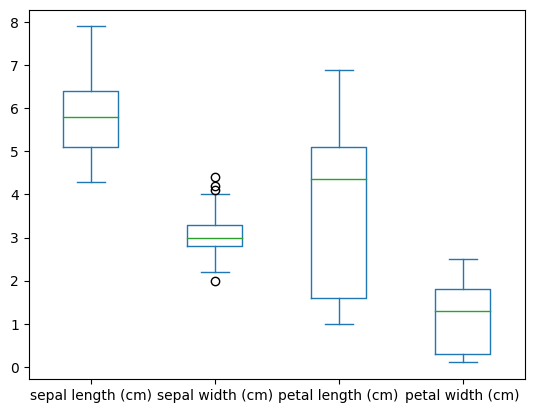

In [ ]:
# boxplot 그려보기
X.plot.box()

In [ ]:
# 특성 스케일링 예제
# 2. 스케일 차이를 확인했으면 특성 스케일링 수행
# 스케일링은 전처리기로 학습기와 사용법이 유사합니다.
# scikit-learn에서 제공하는 스케일링 기법은 다양하지만 이 예제에서는 최소최대정규화를 해보겠습니다.
# 최소최대정규화는 모든 특성의 값을 0~1로 변환하는 스케일링 기법입니다.

# MinMaxScaler 추가
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 초기화
scaler = MinMaxScaler()

# 스케일 변환
# 대부분의 sklearn 전처리기는 fit_transform 함수를 이용하여 입력 독립변수를 전처리 합니다.
# 입력에는 전체 독립변수를 전달합니다.
# 변환된 값을 저장해야 하므로 별도의 변수에 저장합니다.
X_scaled = scaler.fit_transform(X)
X_scaled

In [ ]:
# 스케일이 변환된 X_scaled 확인
# min, max 출력
pd.DataFrame(X_scaled, columns=X.columns).agg(['min', 'max'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
min,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0


<Axes: >

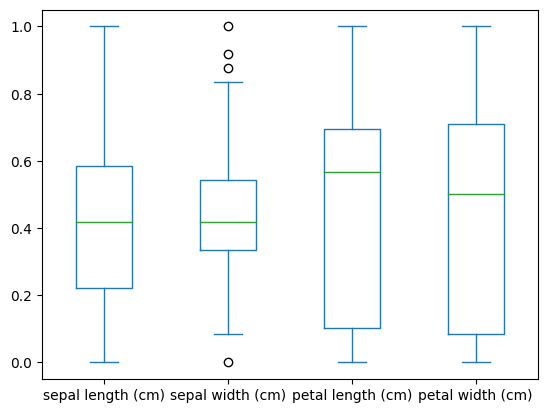

In [ ]:
# 스케일이 변환된 X_scaled 확인
# boxplot으로 시각화
pd.DataFrame(X_scaled, columns=X.columns).plot.box()

 - 특성 스케일링을 완료했으면 학습 시 X가 아닌 X_scaled를 데이터 분할 시 사용하여 학습에 적용합니다.